In [3]:
data1 = [
    (0,196),
    (10,178),
    (20,161),
    (30,148),
    (40,136),
    (50,124),
    (60,115),
    (70,106),
    (80,99),
    (90,91),
    (100,87),
    (110,81),
    (120,75),
    (130,71),
    (140,66),
    (150,63),
    (160,60),
    (170,57),
    (180,56),
    (190,53),
    (200,50),
    (210,48),
    (220,46),
    (230,44),
    (240,43),
    (250,41),
    (260,40),
    (270,39),
    (280,38),
    (290,36),
    (300,34)
]

data2 = [
    (0,212),
    (10,140),
    (20,108),
    (30,80),
    (40,69),
    (50,57),
    (60,48),
    (70,42),
    (80,37),
    (90,32),
    (100,30),
    (110,27),
    (120,25),
    (130,23),
    (140,21),
    (150,19),
    (160,18),
    (170,17.2),
    (180,17),
    (190,16),
    (200,15),
    (210,14.3),
    (220,14),
    (230,13.7),
    (240,13.3),
    (250,13.1),
    (260,13),
    (270,12.5),
    (280,12),
    (290,12.3),
    (300,12)
]

data3 = [
    (0,215),
    (10,171),
    (20,148),
    (30,129),
    (40,113),
    (50,98),
    (60,87),
    (70,76),
    (80,68),
    (90,63),
    (100,57),
    (110,52),
    (120,46),
    (130,45),
    (140,42),
    (150,39),
    (160,37),
    (170,34),
    (180,32),
    (190,32),
    (200,30),
    (210,28),
    (220,28),
    (230,26),
    (240,25),
    (250,24),
    (260,24),
    (270,23),
    (280,22),
    (290,21),
    (300,22),
]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def line(x, m, q):
    return m*x + q

def exp(x, a, b):
    return a*np.e**(b*x)

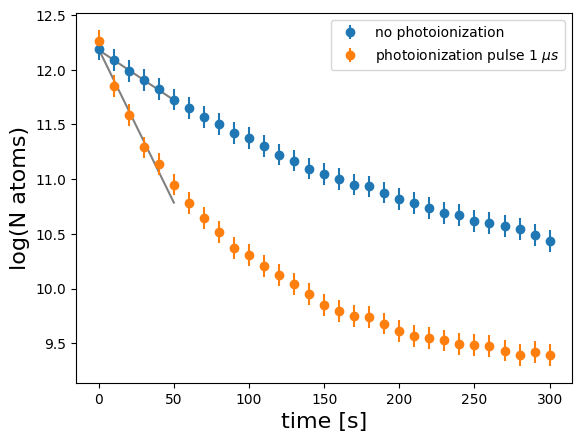

In [5]:
rates = []
off = []
d_rates = []

labels = ["no photoionization", r"photoionization pulse $1 \ \mu s$"]

for i, data in enumerate([data1, data2]):
    datay = np.array([data_[1] for data_ in data])*10**3
    dy = (1/datay)*datay/10
    datay = np.log(datay)

    X = np.array([data_[0] for data_ in data])

    min_index = 0
    max_index = 5
    result, cov = curve_fit(line, X[min_index:max_index], datay[min_index:max_index], sigma=dy[min_index:max_index])
    rates.append(result[0])
    d_rates.append(cov[0][0])
    off.append(result[1])

    x = np.linspace(0,  X[max_index], 100)
    y = line(x, result[0], result[1])

    plt.plot(x,y,c="gray")
    plt.errorbar(X, datay, dy, marker="o", ls="", label=labels[i])

plt.xlabel("time [s]", fontsize=16)
plt.ylabel("log(N atoms)", fontsize=16)
plt.legend()
plt.show()

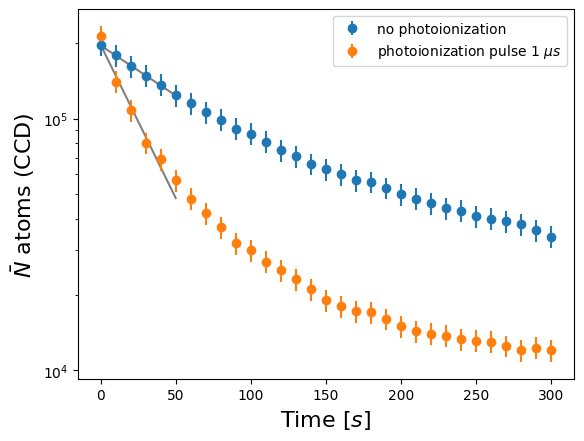

In [24]:
for i, data in enumerate([data1, data2]):
    datay = np.array([data_[1] for data_ in data])*10**3
    X = np.array([data_[0] for data_ in data])

    x = np.linspace(0, X[max_index], 100)
    y = exp(x, np.e**off[i], rates[i])

    plt.plot(x,y,c="gray")
    plt.errorbar(X, datay, datay/10, marker="o", ls="", label=labels[i])

plt.legend()
plt.yscale("log")
plt.xlabel(r"Time [$s$]", fontsize=16)
plt.ylabel(r"$\bar{N}$ atoms (CCD)", fontsize=16)

#plt.savefig('det_efficinency_ggood.png', dpi=300)
plt.show()

In [7]:
np.sqrt(2.1)

1.449137674618944

In [27]:
(0.2/2 + 0.4/4.6) * 2/4.6

0.08128544423440455

In [9]:
np.array(rates)*1e3

array([ -9.15490824, -28.04575328])

In [10]:
np.array(d_rates)*1e3

array([4.44877763e-05, 6.51774678e-03])

In [11]:
(9.83551471 + 9.43086342)/2


9.633189065

In [12]:
(9.83551471 + 9.43086342)/2


9.633189065

In [13]:

(33.722 + 31.831)/2

32.7765

In [14]:
32.7-9.6

23.1

In [15]:
#dN_i1 = -(rates[2]*np.e**off[2] - rates[0]*np.e**off[0]) * 10**3
dN_i2 = -(rates[1]*np.e**off[1] - rates[0]*np.e**off[0]) 

print(-rates[1]*np.e**off[1], "-", -rates[0]*np.e**off[0], " = ", dN_i2)

5508.5180017865605 - 1785.8008809296837  =  3722.717120856877


In [16]:
print((6966.39 + 6493.416 + 5508.518)/3)
print(np.std([6966.39, 6493.416, 5508.518]))

6322.774666666667
607.2816702746393


In [17]:
print((1929.06 + 1844.713 + 1785.8008)/3)
print(np.std([1929.06, 1844.713, 1785.8008]))

1853.1912666666667
58.791781457464104


In [18]:
(0.06/1.84 + 0.4/6.4)*4.65

0.44225543478260876

In [19]:
(0.2/2 + 0.4/4.65)*0.43

0.07998924731182797

In [20]:
sing_meas1 = 2.2
freq_cyc1 = 100
per_cyc1 = 1/freq_cyc1

N_det1 = sing_meas1*freq_cyc1

sing_meas2 = 2.
freq_cyc2 = 1000
per_cyc2 = 1/freq_cyc2

N_det2 = sing_meas2*freq_cyc2

print(N_det2)

2000.0


In [21]:
print(N_det2/dN_i2)

0.5372420022984851


In [22]:
2/4.65

0.4301075268817204